In [44]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables in SQLalchemy ORM

In [46]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect
from datetime import timedelta

In [47]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [48]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine, reflect=True)

# reflect the tables
Base.classes.keys()

/var/folders/r7/5rnhtw1s0kd514zcq5h7swb40000gn/T/ipykernel_32990/386937400.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(autoload_with=engine, reflect=True)


['measurement', 'station']

In [50]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [51]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [52]:
# Find the most recent date in the data set.
end_date = session.query(func.max(measurement.date)).first()
date_new = pd.to_datetime(end_date)

print(date_new)

DatetimeIndex(['2017-08-23'], dtype='datetime64[ns]', freq=None)


2016-08-23 00:00:00


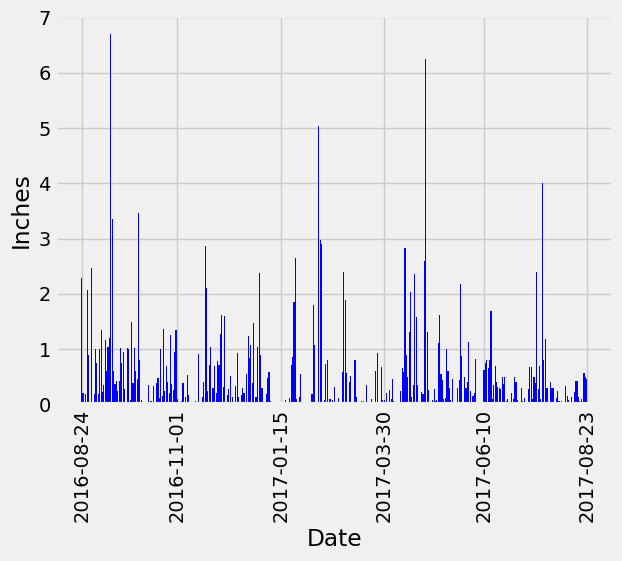

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
p_year = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
print(p_year)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= p_year).all()
#print(results)

#Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_year = [{"date": row[0], "prcp": row[1]} for row in results]
df = pd.DataFrame(rain_year, columns=["date", "prcp"])

# Sort the dataframe by date
df = df.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
x_column = 'date'
y_column = 'prcp'
plt.bar(df[x_column], df[y_column], color='blue')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(["2016-08-24", "2016-11-01", "2017-01-15", "2017-03-30", "2017-06-10", "2017-08-23"], rotation=90)

plt.show() 

In [54]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = df.describe(include = 'all')
print(summary)

              date         prcp
count         2223  2015.000000
unique         365          NaN
top     2016-08-24          NaN
freq             7          NaN
mean           NaN     0.176462
std            NaN     0.460288
min            NaN     0.000000
25%            NaN     0.000000
50%            NaN     0.020000
75%            NaN     0.130000
max            NaN     6.700000


# Exploratory Station Analysis

In [55]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()

9

In [56]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station, func.count()).group_by(measurement.station).order_by(func.count().desc())
for station in station_activity:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [57]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
max = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
mean = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(min)  
print(max)
print(mean)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


[(77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), 

Text(0.5, 4.183333333333314, 'Temp')

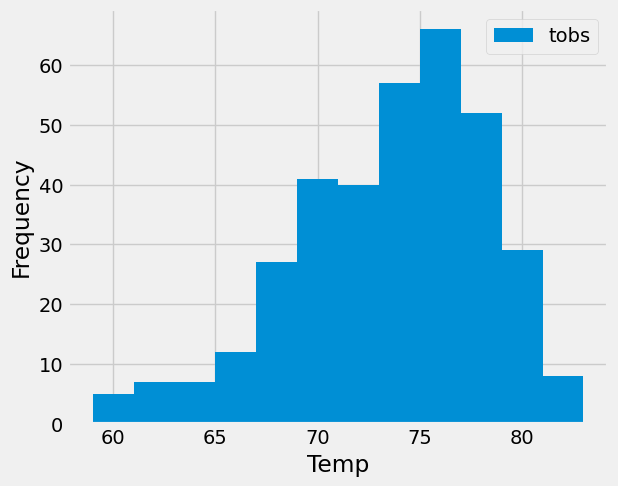

In [58]:
#gather the last year of temps filtered by the most active station
temps = session.query(measurement.tobs).filter(measurement.date >= p_year).filter(measurement.station == 'USC00519281').all()
print(temps)

df2 = pd.DataFrame(temps, columns=["tobs"])
print(df2) 

#graph the years worth of temps, 
df2.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temp")

#another valuable method
#df2 = pd.DataFrame(temps, columns=["tobs"])
#plt.hist(df2['tobs'], bins=12, color='blue')
#plt.xlabel('Temperature Bins')
#plt.ylabel('Frequency')
#plt.show()

# Close Session

In [59]:
# Close Session
session.close()